# A Note on Hypothesis Testing and Bayesian Inference

#### Kai Zhang, Columbia University, 2018

##### References:
1. Probability and Statistics for Engineering and the Sciences by Jay L. Devore
2. Bayesian Statistics: An Introduction by  Peter M. Lee
3. Data Analysis: An Bayesian Tutorial by  D. S. Sivia and J. Skilling
4. An Introduction to Statistical Learning by James, G., Witten, D., Hastie, T., Tibshirani, R.
5. Probability Theory: The Logic of Science by  E. T. Jaynes


##### Notes:
1. Section 0 Background is for readers not familiar with Gaussian distribution, and can otherwise be skipped.
2. Cells containing code that makes certain plots can be hidden by clicking on the links provided.

In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
from IPython.display import HTML
from IPython.display import display

# 0. Background

### 0.1 Normal Distribution (Gaussian Distribution)

The random variable $X$ has a __normal distribution__ with mean $\mu$ and variance $\sigma^2$: $X \sim N(\mu, \sigma^2)$, if the __probability density function__ (pdf)  of $X$  (Figure 1) is
 
\begin{equation}
f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}, ~~~ -\infty<x<\infty
\end{equation}

In [3]:
def Gaussian(x, mu, sigma):
    return 1.0 / math.sqrt(2.0*math.pi*sigma**2) * np.exp(-(x-mu)**2/2/sigma**2 )

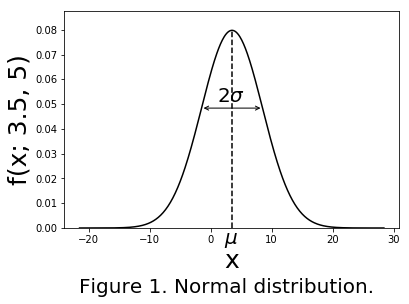

In [4]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide code making this plot, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

fig = plt.figure()
mu = 3.5
sigma = 5
xmin = mu - 5*sigma
xmax = mu + 5*sigma
ymax = 1.0 / np.sqrt(2.0*math.pi*sigma**2)
x = np.arange(xmin,xmax, 0.1)
y = Gaussian(x, mu, sigma)

fsigma = Gaussian(mu+sigma, mu, sigma)

plt.plot(x, y, 'k-')
plt.plot([mu, mu], [0, ymax], 'k--')
plt.annotate(s='', xy=(mu-sigma,fsigma), xytext=(mu+sigma,fsigma), arrowprops=dict(arrowstyle='<->'))

plt.text(mu-sigma/2,fsigma*(1+0.05), '$2\sigma$',fontsize=20)
plt.text(mu-sigma/4, -ymax*0.08, '$\mu$', fontsize=20)

plt.xlabel('x', fontsize=25)
plt.ylabel('f(x; {}, {})'.format(mu, sigma), fontsize=25)
plt.ylim(0, ymax*(1+0.1))
txt="Figure 1. Normal distribution."
fig.text(0.5, -0.1, txt, ha='center', fontsize=20)
plt.show()

### 0.2 Standard Normal Distribution

If $X \sim N(\mu, \sigma^2)$, then $Z = \frac{X-\mu}{\sigma}\sim N(0, 1)$ has a __standard normal distribution__ with pdf

\begin{equation}
f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}, ~~~ -\infty<z<\infty
\end{equation}

The __Cumulative Distribution Function__ (CDF) of $Z$ is

$\Phi(z) \equiv P(Z \le z) = \int_{-\infty}^z f(z') dz'$

$z_{\alpha}$ denotes the value of $z$ such that $P(Z > z_{\alpha}) = 1 - \Phi(z_{\alpha}) = \alpha$ or $P(Z \le z_{\alpha})=1-\alpha$, e.g. $\Phi(z_{0.05}=1.645) = 0.95$ (Figure 2a).

$z_{\alpha/2}$ denotes the value of $z$ such that $P(Z > z_{\alpha/2}) =  1 - \Phi(z_{\alpha/2})  = \alpha/2$ or $P(-z_{\alpha/2} \le Z \le z_{\alpha/2})=1-\alpha$, e.g. $\Phi(z_{0.05/2}=1.96) = 0.975$ (Figure 2b).

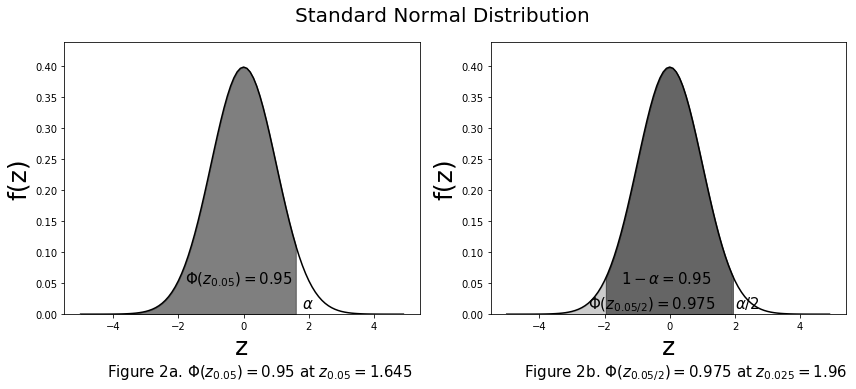

In [5]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide code making this plot, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

fig = plt.figure(figsize=(14,5))
fig.suptitle('Standard Normal Distribution', fontsize=20)
mu = 0
sigma = 1
xmin = mu - 5*sigma
xmax = mu + 5*sigma
ymax = 1.0 / np.sqrt(2.0*math.pi*sigma**2)
x = np.arange(xmin,xmax, 0.1)
y = Gaussian(x, mu, sigma)

fig1=plt.subplot(121)
plt.plot(x, y, 'k-')
z0  = 1.645
z = np.arange(xmin,z0, 0.1)
fz = Gaussian(z, mu, sigma)
plt.fill_between(z, 0, fz,color = 'k', alpha = 0.5)

plt.xlabel('z', fontsize=25)
plt.ylabel('f(z)', fontsize=25)
plt.ylim(0, ymax*(1+0.1))
txt="Figure 2a. $\Phi(z_{0.05})=0.95$ at $z_{0.05}=1.645$"
fig1.text(0.5, -0.1, txt, ha='center', fontsize=15)
plt.text(-1.8, 0.05, '$\Phi(z_{0.05})=0.95$', fontsize=15)
plt.text(1.8, 0.01, '$\\alpha$', fontsize=15)


fig2=plt.subplot(122)
plt.plot(x, y, 'k-')

z0  = 1.96
z = np.arange(-z0,z0, 0.1)
fz = Gaussian(z, mu, sigma)
plt.fill_between(z, 0, fz, color = 'k', alpha = 0.5)

z = np.arange(xmin,z0, 0.1)
fz = Gaussian(z, mu, sigma)
plt.fill_between(z, 0, fz, color = 'k',alpha=0.2)

plt.xlabel('z', fontsize=25)
plt.ylabel('f(z)', fontsize=25)
plt.ylim(0, ymax*(1+0.1))
txt="Figure 2b. $\Phi(z_{0.05/2})=0.975$ at $z_{0.025}=1.96$"
fig2.text(0.5, -0.1, txt, ha='center', fontsize=15)
plt.text(-1.5, 0.05, '$1 - \\alpha = 0.95$ ',fontsize=15) # r'1- $ \alpha $'
plt.text(-2.5, 0.01, '$\Phi(z_{0.05/2})=0.975$', fontsize=15)
plt.text(2, 0.01, '$\\alpha / 2$', fontsize=15)



plt.show()

### 0.3 Central Limt Theorem and Point Estimation

The __Central Limit Theorem__ (CLT)

If $X_1$, $X_2$, ..., $X_n$ is a random sample from a (any) distribution with (population) mean $\mu$ and variance $\sigma^2$, then the __sample mean__ $\bar{X} = \sum_{i=1}^n X_i / n \sim N(\mu, \sigma^2/n)$ or $Z= \frac{\bar{X} - \mu}{ \sigma/\sqrt{n} }\sim N(0, 1)$, as $n \rightarrow \infty$.

>$\bar{X} = \sum_{i=1}^n X_i / n$ is an unbiased estimator of $\mu$;

>$S^2 = \sum_{i=1}^n (X_i - \bar{X})^2 / (n-1)$ is an unbiased estimator of $\sigma^2$.

A point estimator $\hat{\theta}$ of $\theta$ is an __unbiased estimator__, if $E(\hat{\theta}) = \theta$.




### 0.4 $z$-distribution
If $X_1$, $X_2$, ..., $X_n$ is a random sample of <font color=red>large</font> size $n$ from a (any) distribution with  mean $\mu$ (the variance $\sigma^2$ is unknown), then
\begin{equation}
Z = \frac{\bar{X} - \mu}{ S / \sqrt{n}} \sim N(0, 1), ~ {\rm as} ~ n \rightarrow \infty.
\end{equation}

### 0.5 $t$-distribution
If $X_1$, $X_2$, ..., $X_n$ is a random sample of size $n$ (not necessarily large) from a <font color=red>normal</font> distribution with  mean $\mu$ (the variance $\sigma^2$ is unknown), then
\begin{equation}
T = \frac{\bar{X} - \mu}{ S / \sqrt{n}}
\end{equation}
has a Student's __$t$-distribution__ with the pdf
\begin{equation}
f_{\nu}(t) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})} \left( 1 + \frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}},
\end{equation}
where $\nu=n-1$ is the number of degrees of freedom (Figure 3).

>$t_{\alpha, \nu}$ denotes the value of $t$ such that  $\int_{-\infty}^{t_{\alpha, \nu}} f_{\nu}(t) dt = 1 - \alpha $.

>$t_{\alpha/2, \nu}$ denotes the value of $t$ such that  $\int_{-t_{\alpha/2, \nu}}^{t_{\alpha/2, \nu}} f_{\nu}(t) dt = 1 - \alpha $.

In [6]:
def StudentT(t, nu):
    return math.gamma((nu+1)/2) / math.sqrt(nu*math.pi)/math.gamma(nu/2) * (1 + t**2 / nu)**(-(nu+1)/2)

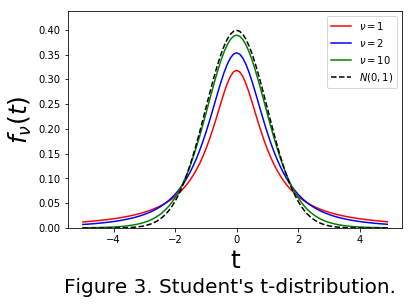

In [7]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide code making this plot, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

fig = plt.figure()

xmin = -5
xmax = 5
ymax = 1.0 / np.sqrt(2.0*math.pi)
x = np.arange(xmin,xmax, 0.1)

y = StudentT(x, 1)
plt.plot(x, y, 'r-')

y = StudentT(x, 2)
plt.plot(x, y, 'b-')

y = StudentT(x, 10)
plt.plot(x, y, 'g-')

y = Gaussian(x, 0, 1)
plt.plot(x, y, 'k--')

plt.legend(['$\\nu=1$', '$\\nu=2$','$\\nu=10$','$N(0,1)$'])
plt.xlabel('t', fontsize=25)
plt.ylabel('$f_{\\nu}(t)$', fontsize=25)
plt.ylim(0, ymax*(1+0.1))
txt="Figure 3. Student's t-distribution."
fig.text(0.5, -0.1, txt, ha='center', fontsize=20)
plt.show()

# 1. Hypothesis Testing

### 1.1 One-Sample $t$-Test and $p$-Value
__Example__ 1.1 Consider a  sequence of $n=10$ random numbers drawn from a normal distribution with certain population mean $\mu$, 

$X=$ $[ 22.82873879, 26.99469089, 25.565957, 21.98741057, 23.8427995, 28.30287307, 20.14664151, 24.14217474, 27.53187252,23.2665192]$

for which the sample mean is $\bar{X} = 24.460967779347346 = \bar{x}$ and the sample variance is $S^2 = 6.793109165375726 = s^2$. 

Question:  Given the sampled data $\bar{x}$,  how confident, or more technically,  at what statistical significance level, can we accept the assumption that $\mu = 25 = \mu_0$?

To answer this question, we need a measure of the deviation $|\bar{X} - 25|$ of our sample mean $\bar{X}$ from the assumed population mean $25$. Qualitatively, if $|\bar{X} - 25|$  is small, we could confidently say the difference between $\bar{X}$  and $25$ is caused by statistical fluctuation of the sample, and thus accept that $\mu$ is indeed $25$. On the other hand, if $|\bar{X} - 25|$  is too large to be accounted for by statistical error, we should reject the claim that $\mu=25$.

Let's go over the above procedure quantitatively using the rules of statistics.

The standardized deviation of the sample mean from the population mean to be tested is described by the __$t$-statistic__ 
\begin{equation}
t = \frac{\bar{x} - \mu_0}{ s / \sqrt{n}} = \frac{24.460967779347346 - 25}{\sqrt{6.793109165375726} / \sqrt{10}} =  -0.6540040368674571.
\end{equation}

The random variable $T = \frac{\bar{X} - \mu}{ S / \sqrt{n}} $ follows the $t$-distribution with $n-1=9$ degrees of freedom, for which we can calculate the probability that $T<|t|$ and $T>|t|$, using the pdf $f_9(t)$.

The probability $P(T>|t|)$ is called the __$p$-value__.

In this particular example, $p$-value $= P(T < -0.6540040368674571 ~ or ~ T > 0.6540040368674571 ) = 0.5294637946339908$.

That is to say, assuming the true population mean is $25$, we have more than $50\%$ chance getting a sample mean value of $24.460967779347346$ (or a standarized $|t|$ value of 0.654 or larger). In another word, it is not surprise to see a sample mean of this value given $\mu=25$ and we should probably accept that $\mu$ is indeed $25$.

If, on the other hand, we observe $\bar{X}=10$ with a $p$-value of 0.0001, we should conclude that it is extremely unlikely for a true population mean of $25$ to result in such a sample mean of $10$. Therefore, we should reject the assumption that $\mu = 25$.

Practically, we  prespecify a __significance level $\alpha$__, e.g. $\alpha=0.05$ or $0.01$ as often used, and compare $p$-value with $\alpha$ (Figure 4).

>If $p$-value $>\alpha$ (or $t < |t_{\alpha/2, \nu}|$), we accept the hypothesis that $\mu = 25$;

>If $p$-value $<\alpha$ (or $t > |t_{\alpha/2, \nu}|$), we reject the hypothesis that $\mu = 25$, but accept the alternative claim that $\mu \ne 25$.

This statistical inference process of testing a claim (hypothesis) using a sampled value $\bar{X}$, assuming  the standardized $\bar{X}$ follows the $t$-distribution, is called __$t$-test__.

In [8]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide the code for above sampling, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

np.random.seed(seed=123)
n = 10
mu = 25
sigma = 2
x = sigma*np.random.randn(n)+mu # Gaussian random number with mean mu and variance sigma^2 
print('X samples:', x)
x_mean = np.mean(x)
s2= np.var(x,ddof=1) # / (n-1)  #x_std = np.std(x)
t_stat = (x_mean - mu) /  math.sqrt(s2/n)
p_value_one_tail = stats.t.cdf(t_stat,n-1)
p_value_two_tail = p_value_one_tail * 2
t_alpha = stats.t.ppf(p_value_one_tail, n-1)
print('sample mean: ', x_mean)
print ('sample variance: ', s2)
print ('t-statistic: ', t_stat)
#print(p_value_one_tail, p_value_two_tail, t_alpha)
print ('p-value = ',p_value_two_tail)

# or a direct method to perform one sample t-test
stats.ttest_1samp(x, mu)

X samples: [22.82873879 26.99469089 25.565957   21.98741057 23.8427995  28.30287307
 20.14664151 24.14217474 27.53187252 23.2665192 ]
sample mean:  24.460967779347346
sample variance:  6.793109165375726
t-statistic:  -0.6540040368674571
p-value =  0.5294637946339908


Ttest_1sampResult(statistic=-0.6540040368674571, pvalue=0.5294637946339908)

### 1.2 Hypothesis Testing (One-Sample $t$-Test)

The underlying assumption (Section 0.5):

If $X_1$, $X_2$, ..., $X_n$ is a random sample of size $n$ (not necessarily large) from a <font color=red>normal</font> distribution with  mean $\mu$ (the variance $\sigma^2$ could be unknown), then the standardized random variable
\begin{equation}
T = \frac{\bar{X} - \mu}{ S / \sqrt{n}}
\end{equation}
has a Student's __$t$-distribution__  with $\nu=n-1$ number of degrees of freedom.

__$t$-test__ (Figure 4):

>__null hypothesis__ $H_0$: $\mu = \mu_0$

>__alternative hypothesis__ $H_a$: $\mu \ne \mu_0$ (or other versions $\mu > \mu_0$, $\mu < \mu_0$  )

>__$t$-statistic__: $t = \frac{\bar{x} - \mu_0}{ s / \sqrt{n}}$ 

>__$p$-value__: $P(T > |t|) = 1- \int_{-t_{\alpha/2, \nu}}^{t_{\alpha/2, \nu}} f_{\nu}(t) dt$ assuming $H_0$ is true. 

For a given __significance level $\alpha$__,

>__acceptance__ region:  $p$-value $>\alpha$ (or $t < |t_{\alpha/2, \nu}|$)

>__rejection__ region:  $p$-value $<\alpha$ (or $t > |t_{\alpha/2, \nu}|$)

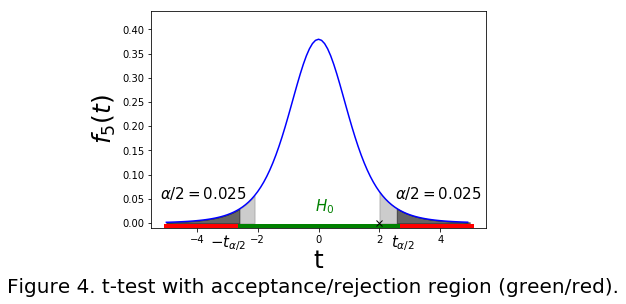

In [9]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide code making this plot, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

fig = plt.figure()

xmin = -5
xmax = 5
ymax = 1.0 / np.sqrt(2.0*math.pi)
x = np.arange(xmin,xmax, 0.1)

nu = 5
y = StudentT(x, nu)
plt.plot(x, y, 'b-')

alpha = 0.05
ta = stats.t.ppf(1- alpha/2, nu)
t = np.arange(xmin,-ta, 0.1)
ft = StudentT(t, nu)
plt.fill_between(t, 0, ft, color = 'k', alpha = 0.5)
t = np.arange(ta,xmax, 0.1)
ft = StudentT(t, nu)
plt.fill_between(t, 0, ft, color = 'k', alpha = 0.5)


t0 = 2
t = np.arange(xmin,-t0, 0.1)
ft = StudentT(t, nu)
plt.fill_between(t, 0, ft, color = 'k', alpha = 0.2)
t = np.arange(t0,xmax, 0.1)
ft = StudentT(t, nu)
plt.fill_between(t, 0, ft, color = 'k', alpha = 0.2)


plt.text(2.5, 0.05, '$\\alpha/2=0.025$', fontsize=15)
plt.text(-5.2, 0.05, '$\\alpha/2=0.025$', fontsize=15)

plt.text(ta-0.2, -0.05, '$t_{\\alpha/2}$', fontsize=15)
plt.text(-ta-1, -0.05, '$-t_{\\alpha/2}$', fontsize=15)


plt.plot([xmin, -ta], [-0.005, -0.005], 'r-', lw =5)
plt.plot([ta, xmax], [-0.005, -0.005], 'r-', lw =5)
plt.plot([-ta, ta], [-0.005, -0.005], 'g-', lw =5)


plt.plot(t0, 0, 'kx')
plt.text(0-0.1, 0.025, '$H_0$', fontsize=15, color='g')



plt.xlabel('t', fontsize=25)
plt.ylabel('$f_{}(t)$'.format(nu), fontsize=25)
plt.ylim(0-0.01, ymax*(1+0.1))
txt="Figure 4. t-test with acceptance/rejection region (green/red)."
fig.text(0.5, -0.1, txt, ha='center', fontsize=20)
plt.show()


### 1.3 t-Test: the Correlation between Predictor $X$ and Response $Y$
__Example 1.2__: Is there a relationship (correlation) between the following predictor $X$ and response $Y$? In another word, is the coefficient $w$ in the linear fitting $Y = w X + b$ zero?

>__null hypothesis__ $H_0$: There is no relationship between predictor $X$ and response $Y$ ($w=0$)

>__alternative hypothesis__ $H_a$: There is some relationship between $X$ and $Y$ ($w\ne 0$)

>__$t$-statistic__: $t =  w / \rm SE(w)$, where $\rm SE(w)$ is the standard error of $w$.

generating n = 100 data points with
slope =  0.8 intercept =  3
and Gaussian noise: σ = 1.5
y = 0.8x + 3 + N(0,1.5^2)




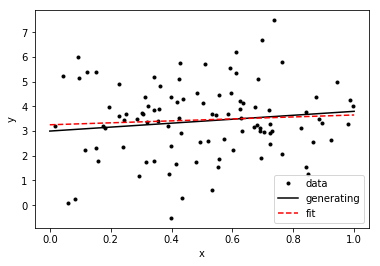

scipy stats linregress fit:
slope =  0.39643027011279186 intercept =  3.254921175662625
p_value =  0.5132329433253047 std_err =  0.6041298228719503


t-statistic:  0.656200464046315 p-value:  0.5132174388340249


statsmodels.api ordinary least squares (ols):
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.2549      0.337      9.651      0.000       2.586       3.924
c1             0.3964      0.604      0.656      0.513      -0.802       1.595


In [10]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide the details of the sampling code, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
#############################################################################################

np.random.seed(seed=123)
n = 100
w1 = 0.8
w0 = 3
noise = 1.5
x = np.random.rand(n)
y = w1*x + w0 + noise*np.random.randn(n)

print ('generating n =', n, 'data points with')
print ('slope = ', w1, 'intercept = ', w0)
print ('and Gaussian noise:', u'\u03C3','=', noise)
#print ('y = {}x'.format(w1), '+ {} +'.format(w0),u'\u03B5')
print ('y = {}x'.format(w1), '+ {} +'.format(w0),'N(0,{}^2)'.format(noise))

print ('\n')

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

x0 = [0, 1]
y0 = [intercept, slope+intercept]

plt.figure()
plt.plot(x, y, 'k.', label='data')
plt.plot(x0, [w0, w1+w0], 'k-', label='generating')
plt.plot(x0, y0, 'r--', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print ('scipy stats linregress fit:')
print('slope = ', slope, 'intercept = ', intercept ) 
print('p_value = ', p_value, 'std_err = ', std_err)
print('\n')

t_stat = slope / (std_err)
p_t = (1- stats.t.cdf(t_stat,n-1))*2
print('t-statistic: ', t_stat, 'p-value: ', p_t)
print('\n')

xc = sm.add_constant(x)
results = sm.OLS(y,xc).fit()
print('statsmodels.api ordinary least squares (ols):')
#print(results.summary()) 
#print(results.params)
#print(results.tvalues)
print(results.t_test([[1, 0], [0, 1]]))

### 1.4 Hypothesis Testing and  Binary Classification: Precision-Recall

1.4.1 In __hypothesis testing__, we can list an acceptance/rejection table

 |  | acceptance | rejection | 
 |:-: | :-: | :-: | :-:|
 |__$H_0$ is true__ | TA  | FR | 
 |__$H_0$ is false__ | FA | TR | 
where TA, FR, FA, TR are the number of cases of true acceptance, false rejection, false acceptance, true rejection, respectively. The corresponding probability table is

 |  | acceptance | rejection | 
 |:-: | :-: | :-: | :-:|
 |__$H_0$ is true__ | $1-\alpha$  | $\alpha$ | 
 |__$H_0$ is false__ | $\beta$ |  $1-\beta$ | 
 


>__type I error__: $H_0$ is rejected when it is true. $P$(type I error) = $\alpha = \frac{FR}{TA + FR}$

>__type II error__:  $H_0$ is accepted when it is false. $P$(type II error) = $\beta = \frac{FA}{FA + TR}$


 trade-off between $\alpha$ and $\beta$: decreasing the size of the rejection region $\rightarrow$ smaller $\alpha$ $\rightarrow$ larger $\beta$.



1.4.2 Consider a __binary classification__ problem with classes: negative "-" (null) and positive "+" (non-null), the confusion matrix is

 |  | predicted - (null) | predicted + (non-null) | total|
 |:-: | :-: | :-: | :-:|
 |__actual - (null)__ | TN  | FP | N|
 |__actual + (non-null)__ | FN | TP | P|
 |__total__ | N* | P*|   N+P=N\*+P\*|
 
 >__false positive rate__ $= 1-$ __specificity__ $=\frac{FP}{TN+FP} = \frac{FP}{N}=$ $P$(type I error) $\sim \alpha$
 
 >__precision__ $=\frac{TP}{TP+FP} = \frac{TP}{P^*}$, the accuracy of positive predictions.
 
 >__recall__ $=$ __true positive rate__ $=\frac{TP}{TP + FN} = \frac{TP}{P}=$ $1 - P$(type II error) $\sim 1-\beta$, fraction of positive instances that are correctly detected.
 
 trade-off between precision and recall: increasing precision reduces recall and vice versa. 
 
 Similarly, trade-off between specificity and recall. 


# 2. Bayesian Inference

### 2.1 Bayes' Theorem and Bayesian Hypothesis Testing

From the definition of __conditional probability__, the joint probability of events $A$ and $B$
\begin{equation}
P(A, B) = P(B|A) P(A) = P(A|B) P(B).
\end{equation}
The __Bayes' Theorem__, given $P(B) \ne 0$, is
\begin{equation}
 P(A|B) = \frac{P(B|A)P(A)}{P(B)}.
\end{equation}

> $A=H$: hypothesis

> $B=D$: data

\begin{equation}
 P(H|D) = \frac{P(D|H)P(H)}{P(D)}.
\end{equation}

\begin{equation}
{\rm posterior} \propto {\rm likelihood} \times {\rm prior}
\end{equation}

> __prior probability__: $P(H)$

> __posterior probability__: $P(H|D)$

> __likelihood__ (sample distribution): $P(D|H)$

> __marginal probability__: $P(D) = \sum_{i} P(D|H_i)P(H_i) $, if $\{H_i\}$'s form a mutually exclusive and exhaustive decompostion of the hypothesis space, e.g. $H_0$ and $H_a$.

A concrete example, the hypothesis is about the parameter of the distribution. 

There is an unknown parameter $\theta$ whose total space is the set $\Theta$, with the property $\Theta_0 \cup \Theta_a = \Theta$ and $\Theta_0 \cap \Theta_a = \emptyset$.
> null hypothesis $H_0$: $\theta \in \Theta_0$ 

> alternative hypothesis $H_a$:  $\theta \in \Theta_a$

> observations (data) of random sample ${\bf X}$: ${\bf x} =  (x_1, x_2, \dots, x_n)$.

In __classical hypothesis testing__ as described in Section 1, we compute the $p$-value $=P({\bf X} \ge |{\bf x}| ~\left| \theta \in \Theta_0\right.)$ and make the decision about whether or not to accept $H_0$ based on a given significance level (type I error probability) $\alpha = P({\bf x}\in R | \theta \in \Theta_0)$, which imposes a __rejection region__ $R=\{{\bf x}: H_0 {\rm~is ~rejected}\}$. 
> $H_0$ is rejected if $p$-value $<\alpha$; accepted, otherwise.

In __Bayesian hypothesis testing__, we calculate the ratio
\begin{equation}
\frac{P( \theta\in\Theta_0 | {\bf x})}{P( \theta\in\Theta_1 | {\bf x})} =  \frac{P({\bf x} | \theta\in\Theta_0)}{P({\bf x} | \theta\in\Theta_1)} \times  \frac{P(\theta\in\Theta_0)}{P( \theta\in\Theta_1)}
\end{equation}

\begin{equation}
{\rm posterior~odds} =  {\rm likelihood~ratio} \times {\rm prior~odds}
\end{equation}

and accept $H_0$ if $P( \theta\in\Theta_0 | {\bf x}) > P( \theta\in\Theta_1 | {\bf x})$ (or $P( \theta\in\Theta_0 | {\bf x}) > 1/2$ or $P( \theta\in\Theta_0 | {\bf x}) > {\rm any~criterion}$).


### 2.2 Bayesian Inference using Posterior Sampling: An Example of Fair Coin

Suppose you are part of a coin-tossing gambling game and observe a sequence of data $x = [H, T, T, H, H, \dots]$, where $H$ and $T$ stands for head and tail respectively. If you see $H$ and $T$ appear roughly with the same frequency, you are more convinced that this is a fair coin; while if you see 8 $T$'s out of 10 tosses, you start to doubt that this coin is biased towards tails.

Let $h$  be the number of heads  in $n$ tosses, and $\theta$ be the probability of getting a head in one toss. A fair coin should exactly have  $\theta = 0.5$. Our goal is to compute the __posterior probability__ density $p(\theta | (n, h))$ given a data sequence $x$ of $H$'s and $T$'s consisting of $h$ heads out of $n$ tosses, which allows us to evaluate whether this coin is fair or not. 

The __prior probability__ density before doing any tosses, $p(\theta)$ reflects our ignorance of information. It could be completely uniform,
\begin{equation}
p(\theta) = 1, ~~~ 0\le\theta\le1,
\end{equation}
or centered around 0.5 (with width $\sim\delta$), if initially we expect the coin to be fair
\begin{equation}
p(\theta) \propto e^{-(\theta - 0.5)^2/\delta^2}.
\end{equation}

We also know that the flips of independent coins are described by the binomial distribution,
\begin{equation}
p((n, h)|\theta) \propto \theta^h (1-\theta)^{n-h},
\end{equation}
which is the probability of obtaining $h$ heads in $n$ tosses for a given $\theta$ (likelihood).

The Bayesian theorem tells that
\begin{equation}
p(\theta | (n, h)) \propto p((n, h)|\theta) p(\theta),
\end{equation}
in which we neglect the denominator $p((n,h))$ and other numerical prefactors, for they do not affect our inference in this problem. 

In the following sampling, we generate a sequence of data $x$ with $n$ tosses and a prespecified fixed probability $\theta_0$. We can see how the posterior probability evolves as we obtain more data. Two types of prior probability are used.

In [11]:
%matplotlib inline
from ipywidgets import interactive

n_points = 1000
theta = np.linspace(0.0, 1.0, num=n_points)

theta0 = 0.4
n_totaltoss = 100

np.random.seed(seed=123)
prob = np.random.rand(n_totaltoss)
x_seq = np.where(prob < theta0, 'H', 'T')
print(x_seq)

def Coin(n_toss,prior_type):
    sample = prob[0:n_toss]
    if prior_type == 0:
        p_prior = np.ones(n_points)
    elif prior_type == 1:
        p_prior = np.exp(-(theta-0.5)**2/0.01)
    plt.figure()
    n_head = (sample < theta0).sum()
    n_tail = (sample > theta0).sum()
    likelihood = theta**n_head*(1.0-theta)**n_tail
    p_posterior = likelihood * p_prior
    plt.plot(theta, p_posterior, 'k-')
    plt.xlabel('$\\theta$', fontsize=15)
    plt.ylabel('$p(\\theta | (n, h))$', fontsize=15)
    plt.xlim(0,1)
    plt.show()

interactive_plot = interactive(Coin, n_toss=(0,n_totaltoss),prior_type=(0,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

['T' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'H'
 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'H' 'H' 'T' 'H' 'T' 'T' 'T' 'T' 'H'
 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'T'
 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'H' 'H' 'T' 'H' 'T'
 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'H' 'H'
 'T' 'T' 'H' 'T' 'T' 'T' 'H' 'H' 'H' 'H']


interactive(children=(IntSlider(value=50, description='n_toss'), IntSlider(value=0, description='prior_type', max=1), Output(layout=Layout(height='350px'))), _dom_classes=('widget-interact',))

### 2.3 Posterior of Normal Prior: An Example of Conjugate Priors

Assume an observation $x\sim N(\theta, \sigma^2)$ with unknown $\theta$ and known $\sigma$. Let our prior knowledge about $\theta$, $p(\theta), $ is a $N(\mu, \tau^2)$ distribution with known $\mu$ and $\tau^2$, then the posterior probability  $p(\theta | x)$ is a $N(\phi, \rho^2)$ distribution, where
\begin{equation}
\phi = \rho^2 (\frac{x}{\sigma^2} + \frac{\mu}{\tau^2}),
\end{equation}
\begin{equation}
\rho^{-2} = \sigma^{-2} + \tau^{-2}.
\end{equation}

__Proof__:

> likelihood $p(x|\theta) = (2\pi\sigma^2)^{-1/2}\exp\left(-\frac{(x-\theta)^2}{2\sigma^2}\right)$

> prior probability  $p(\theta) = (2\pi\tau^2)^{-1/2}\exp\left(-\frac{(\theta-\mu)^2}{2\tau^2}\right)$

> posterior probability $p(\theta | x) \propto  p(x|\theta) p(\theta) \propto \exp\left(-\frac{1}{2}\left[ \frac{(x-\theta)^2}{\sigma^2} + \frac{(\theta-\mu)^2}{\tau^2} \right]\right)$

> 
\begin{equation}
\begin{split} 
\frac{(x-\theta)^2}{\sigma^2} + \frac{(\theta-\mu)^2}{\tau^2} &= \left(\frac{1}{\sigma^2} + \frac{1}{\tau^2}\right)\theta^2 - 2\left( \frac{x}{\sigma^2} + \frac{\mu}{\tau^2} \right)\theta + \left( \frac{x^2}{\sigma^2} + \frac{\mu^2}{\tau^2}\right)\\
&=\frac{1}{\rho^2} \left[\theta^2-2\rho^2\left( \frac{x}{\sigma^2} + \frac{\mu}{\tau^2} \right)\theta \right] + \left( \frac{x^2}{\sigma^2} + \frac{\mu^2}{\tau^2}\right)\\
&=\frac{1}{\rho^2} \left[\theta-\rho^2\left( \frac{x}{\sigma^2} + \frac{\mu}{\tau^2} \right)\right]^2 -\rho^2\left( \frac{x}{\sigma^2} + \frac{\mu}{\tau^2} \right)^2+ \left( \frac{x^2}{\sigma^2} + \frac{\mu^2}{\tau^2}\right)\\
&= \rho^{-2}(\theta - \phi)^2 + \frac{(x - \mu)^2}{\sigma^2 + \tau^2}
\end{split} 
\end{equation}

> So, $p(\theta | x) \propto  \exp\left(-\frac{(\theta - \phi)^2}{2\rho^2}\right) \exp\left( -\frac{(x - \mu)^2}{2(\sigma^2 + \tau^2)}\right)$ and by the normalization condition $\int p(\theta | x) d\theta = 1$, we find

>\begin{equation}
p(\theta | x) = (2\pi\rho^2)^{-1/2}  \exp\left(-\frac{(\theta - \phi)^2}{2\rho^2}\right).
\end{equation}


 ### 2.4 One-Sided Bayesian Hypothesis Testing
 
 If a random sample $X\sim N(\mu, \sigma^2)$ with known $\sigma$ and unknown $\mu$ to be inferred, and the prior probability  density $p(\mu) = 1$, then the posterior probability density $p(\mu | x)$ is $N(x, \sigma^2)$, because
\begin{equation}
  p(\mu | x) \propto p(x|\mu)p(\mu) = (2\pi\sigma^2)^{-1/2} \exp\left( - (x - \mu)^2 / 2\sigma^2 \right) = (2\pi\sigma^2)^{-1/2} \exp\left( - (\mu - x)^2 / 2\sigma^2 \right). 
\end{equation}

Consider this one-sided hypothesis testing task:

> null hypothesis $H_0$: $\mu \le \mu_0$,

> alternative hypothesis $H_a$: $\mu > \mu_0$.


posterior probability of $H_0$:
\begin{equation}
P(H_0 | x) = P(\mu \le \mu_0 | x) = \int_{-\infty}^{\mu_0} (2\pi\sigma^2)^{-1/2} \exp\left( - (\mu - x)^2 / 2\sigma^2 \right) d\mu = \Phi\left(\frac{\mu_0 - x}{\sigma}\right)
\end{equation}

posterior probability of $H_a$:
\begin{equation}
P(H_1 | x) = 1-\Phi\left(\frac{\mu_0 - x}{\sigma}\right)
\end{equation}


Bayesian hypothesis testing:  accepting $H_0$ if $P(H_0 | x) \ge \alpha$ (say $\alpha=0.05$).
 
 
In classical hypothesis testing of the sharp null hypothesis $H_0$: $\mu=\mu_0$,  
\begin{equation}
p{\rm-value} =P(X\ge x | \mu = \mu_0) = 1-\Phi\left(\frac{x-\mu_0}{\sigma}\right) = \Phi\left(\frac{\mu_0-x}{\sigma}\right) =P(H_0 | x),
\end{equation}
and we accept $\mu = \mu_0$ if $p$-value $\ge \alpha$.

Note: the Bayesian hypothesis testing of $\mu = \mu_0$ raises some conceptual problems that need to be carefully taken care of. Strictly speaking, for a continuous distribution, $P(\mu = \mu_0 | x) = 0$. And practically, $\mu$ never equals to a certain $\mu_0$ exactly. The null hypothesis on a interval $\mu \in (\mu_0 - \epsilon, \mu_0 + \epsilon)$ is mathematically more reasonable.

To connect with the notation of sample mean $\bar{X}$ of $n$ random samples  $X_1$, $X_2$, ..., $X_n$  and $z$-test, just replace $X=x$ with $\bar{X}=\bar{x}$ and $\sigma$ with $\sigma/\sqrt{n}$, for the central limit theorem guarantees that $\bar{X}\sim N(\mu, \sigma^2/n)$.


